In [1]:
import numpy as np
import glob

from scipy import stats
import matplotlib.pyplot as plt

data_directory = "./vis_project_data/"

# Default weights adjusted to match results
cog_weights = np.array([0, -1, 1, 2, 2, 3, 5])
so_weights = np.array([-1, 0, 1, 2, 2, 3, 5])


# Types of sessions/files:
session_types = ["cog", "so"]
whatdoors = ["indoor", "outdoor"]
whichs = ["base", "inter"]
ca_peer_list = ["albert", "barry", "chris", "dana"]

# Combine to single itteratable list
combined_scenarios = [
    (ses_type, whatdoor, which)
    for ses_type in session_types
    for whatdoor in whatdoors
    for which in whichs
]

data_directory = "./vis_project_data/"

# Default weights adjusted to match results
cog_weights = np.array([0, -1, 1, 2, 2, 3, 5])
so_weights = np.array([-1, 0, 1, 2, 2, 3, 5])


# Types of sessions/files:
session_types = ["cog", "so"]
whatdoors = ["indoor", "outdoor"]
whichs = ["base", "inter"]
ca_peer_list = ["albert", "barry", "chris", "dana"]

# Combine to single itteratable list
combined_scenarios = [
    (ses_type, whatdoor, which)
    for ses_type in session_types
    for whatdoor in whatdoors
    for which in whichs
]

def unique_pairs():
    """Returns list of unique ca/peer pairs"""
    all_files = glob.glob(data_directory + "/*.dtx")
    list = []
    for file in all_files:
        t = file.split("-")
        list.append([t[4], t[5]])

    return np.unique(list, axis=0)

def get_files(ca, peer):
    files = []
    for ses_type, whatdoor, which in combined_scenarios:
        file_pattern = f"{ses_type}-*-{which}-*-{ca}-{peer}-{whatdoor}.dtx"
        files.extend(glob.glob(data_directory + file_pattern))
    return files

# get trained dyads
def get_trained_pair_files():
    ca_peer_list = unique_pairs()
    file_list = []
    for pair in ca_peer_list:
        files = get_files(pair[0], pair[1])
        if pair[1][0].upper() >= 'U' and pair[1][0].upper() <= 'Z':
            file_list.append(files)
    return file_list

# get untrained dyads
def get_untrained_pair_files():
    ca_peer_list = unique_pairs()
    file_list = []
    for pair in ca_peer_list:
        files = get_files(pair[0], pair[1])
        if pair[1][0].upper() >= 'L' and pair[1][0].upper() <= 'P':
            file_list.append(files)
    return file_list

# returns all the trials in a list for a given CA and scenario
def filter_ca_scenario(files, ses_type, which, ca, whatdoor):
    filtered_files = []
    for file_pair_list in files:
        for file in file_pair_list:
            file_name = file.split('\\')[-1]  # Extract the file name
            components = file_name.split('-')      
            #print("file components")
            #print(components)
            if len(components) >= 7 and \
                components[0] == ses_type and \
                components[-1].startswith(whatdoor) and \
                components[2] == which and \
                components[4] == ca:
                filtered_files.append(file)
    #print(filtered_files)
    return filtered_files

#filter_ca_scenario(get_trained_pair_files(), "cog", "base", "albert", "indoor")

def combined_score(filename, weights):
    """Calculates the 'score' for a single session/file.
    Assumes total session duration is 360s, otherwise returns 'nan'.
    This could be modified simply to also return other details of the session."""
    with open(filename, "r") as file:
        score = 0.0
        total_duration = 0.0
        t_end_prev = 0.0
        for count, line in enumerate(file.readlines()):
            # print(count, line)
            data = line.split(",", 4)
            if count == 0:
                continue
            if line[0] == "*":
                break

            t_catagory = int(data[0])
            t_beg = int(data[1])
            t_end = int(data[2])

            if t_beg != t_end_prev:
                print("Error, missing time stamp?")
            t_end_prev = t_end

            assert t_end >= t_beg
            if count == 1:
                assert t_beg == 0

            duration = float(t_end - t_beg)
            total_duration += duration
            score += weights[t_catagory - 1] * duration
        return score / total_duration
    
def get_ca_scenario_stats(files, ses_type):
    if ses_type == "so":
        weights = so_weights
    else:
        weights = cog_weights
    scores = []
    statistics = []
    for file in files:
        temp_score = combined_score(file, weights)
        #print(temp_score)
        scores.append(temp_score)
    statistics.append(np.mean(scores))
    sdev = np.std(scores, ddof=1)  # "corrected" sdev
    statistics.append(sdev)
    statistics.append(sdev / np.sqrt(len(scores)))
    return statistics # returns mean, std, and standard error of mean

files = filter_ca_scenario(get_trained_pair_files(), "so", "base", "albert", "indoor")
get_ca_scenario_stats(files, "so")

[0.4961111111111111, 0.46407431423835827, 0.20754034264971352]

C:\Users\jyin1\AppData\Local\Temp\ipykernel_32632\1270322160.py:44: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_before, y_before, yerr=errors_before, fmt='o', label='Before', color='black', marker='s')
C:\Users\jyin1\AppData\Local\Temp\ipykernel_32632\1270322160.py:45: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_after, y_after, yerr=errors_after, fmt='o', label='After', color='black', marker='^')


[-0.42000000000000004, -0.5395833333333333, -0.7854166666666668, -0.05952380952380954, -0.4511309523809524]
[0.2666021333951853, 0.054307450000109586, 0.055362802189332365, 0.29719431774690747, 0.16836667583288367]


C:\Users\jyin1\AppData\Local\Temp\ipykernel_32632\1270322160.py:96: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_before, y_before, yerr=errors_before, fmt='o', color='orange', marker='s')
C:\Users\jyin1\AppData\Local\Temp\ipykernel_32632\1270322160.py:97: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_after, y_after, yerr=errors_after, fmt='o', color='orange', marker='^')


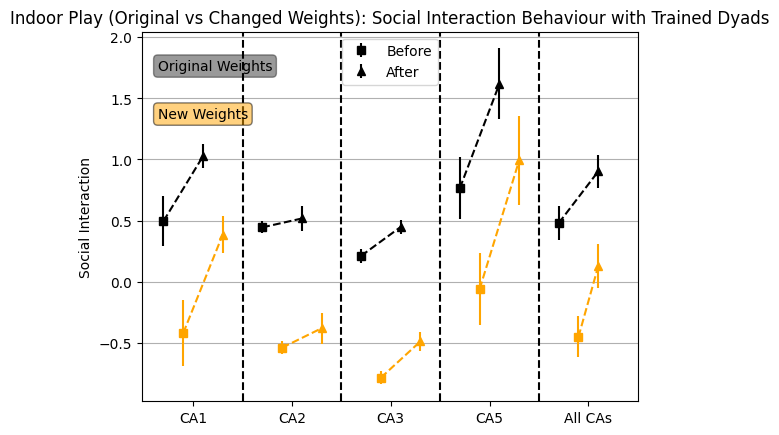

In [22]:
# SOCIAL INTERACTION 
# original weights
cog_weights = np.array([0, -1, 1, 2, 2, 3, 5])
so_weights = np.array([-1, 0, 1, 2, 2, 3, 5])

# before training
before_avg = []
before_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "so", "base", ca, "indoor"), "so")
    before_avg.append(statistics[0])
    before_err.append(statistics[2])

overall_bef_avg = np.mean(before_avg)
overall_bef_err = np.mean(before_err)
before_avg.append(overall_bef_avg)
before_err.append(overall_bef_err)

# after training
after_avg = []
after_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "so", "inter", ca, "indoor"), "so")
    after_avg.append(statistics[0])
    after_err.append(statistics[2])
    
overall_af_avg = np.mean(after_avg)
overall_af_err = np.mean(after_err)
after_avg.append(overall_af_avg)
after_err.append(overall_af_err)

x_before = np.array([0.5, 3, 5.5, 8, 10.5])
y_before = before_avg
errors_before = before_err

x_after = np.array([1.5, 4, 6.5, 9, 11.5])
y_after = after_avg
errors_after = after_err

# Plotting the error bar graph
plt.errorbar(x_before, y_before, yerr=errors_before, fmt='o', label='Before', color='black', marker='s')
plt.errorbar(x_after, y_after, yerr=errors_after, fmt='o', label='After', color='black', marker='^')
    
# add average line
for i in range(len(x_before)):
    plt.plot([x_before[i], x_after[i]], [before_avg[i], after_avg[i]], color='black', linestyle='--')

# changed weights
cog_weights = np.array([0, -1, 1, 3, 2, 3, 5])
so_weights = np.array([-2, -1, 0, 2, 4, 3, 5])
# get data points for graph: trained dyads indoor play social 
# before training
before_avg = []
before_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "so", "base", ca, "indoor"), "so")
    before_avg.append(statistics[0])
    before_err.append(statistics[2])

overall_bef_avg = np.mean(before_avg)
overall_bef_err = np.mean(before_err)
before_avg.append(overall_bef_avg)
before_err.append(overall_bef_err)
print(before_avg)
print(before_err)
# after training
after_avg = []
after_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "so", "inter", ca, "indoor"), "so")
    after_avg.append(statistics[0])
    after_err.append(statistics[2])
    
overall_af_avg = np.mean(after_avg)
overall_af_err = np.mean(after_err)
after_avg.append(overall_af_avg)
after_err.append(overall_af_err)

#  X-axis for "before" and "after" measurements
x_before = np.array([1, 3.5, 6, 8.5, 11])
y_before = before_avg
errors_before = before_err

x_after = np.array([2, 4.5, 7, 9.5, 11.5])
y_after = after_avg
errors_after = after_err

# Plotting the error bar graph
plt.errorbar(x_before, y_before, yerr=errors_before, fmt='o', color='orange', marker='s')
plt.errorbar(x_after, y_after, yerr=errors_after, fmt='o', color='orange', marker='^')

# add average line
for i in range(len(x_before)):
    plt.plot([x_before[i], x_after[i]], [before_avg[i], after_avg[i]], color='orange', linestyle='--')

lines = np.array([2.5, 5, 7.5, 10, 12.5])
# Adding vertical lines to separate groups
for i in range(len(lines) - 1):
    plt.axvline(lines[i], color='black', linestyle='--')
    
# Adding labels and title
plt.ylabel('Social Interaction')
plt.title('Indoor Play (Original vs Changed Weights): Social Interaction Behaviour with Trained Dyads')

# Customizing x-axis ticks and labels
plt.xticks(lines - 1.25, ['CA1', 'CA2', 'CA3', 'CA5', "All CAs"])
    
# Adding legend
plt.legend()
plt.text(0.15, 0.8, "Original Weights", bbox=dict(facecolor='black', alpha=0.4, edgecolor='black', boxstyle='round,pad=0.3'), transform=plt.gcf().transFigure)
plt.text(0.15, 0.7, "New Weights", bbox=dict(facecolor='orange', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.3'), transform=plt.gcf().transFigure)

# Display the plot
plt.grid(axis='y')
plt.xlim(right=12.5)
plt.show()

In [3]:
# Get p-values
trained_files = get_trained_pair_files()
# Loop through each CA
avg_before = []
avg_after = []
for i, ca in enumerate(ca_peer_list):
    # Get data for the current CA
    before_data = []  # Data before training for current CA
    after_data = []   # Data after training for current CA
        
    # Extract data for the current CA
    before_files = filter_ca_scenario(trained_files, "so", "base", ca, "indoor")
    for file in before_files:
        score = combined_score(file, so_weights)
        before_data.append(score)
    after_files = filter_ca_scenario(trained_files, "so", "inter", ca, "indoor")
    for file in after_files:
        score = combined_score(file, so_weights)
        after_data.append(score)

    # Perform paired t-test for the current CA
    t_statistic, p_value = stats.ttest_ind(before_data, after_data)
    print("Independent two-sample t-test results:")
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    if p_value <= 0.05:
        print(ca)


Independent two-sample t-test results:
t-statistic: -2.859536190206561
p-value: 0.013409533639423377
albert
Independent two-sample t-test results:
t-statistic: -0.702183323950953
p-value: 0.4940746485381172
Independent two-sample t-test results:
t-statistic: -2.1699300594677657
p-value: 0.04771028680787279
chris
Independent two-sample t-test results:
t-statistic: -1.9747650017940304
p-value: 0.06476572757416134


C:\Users\jyin1\AppData\Local\Temp\ipykernel_32632\4038046643.py:46: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_before, y_before, yerr=errors_before, fmt='o', label='Before', color='black', marker='s')
C:\Users\jyin1\AppData\Local\Temp\ipykernel_32632\4038046643.py:47: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_after, y_after, yerr=errors_after, fmt='o', label='After', color='black', marker='^')
C:\Users\jyin1\AppData\Local\Temp\ipykernel_32632\4038046643.py:99: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_before, y_before, yerr=errors_before, fmt='o', color='orange', marker='s')
C:\Users\jyin1\Ap

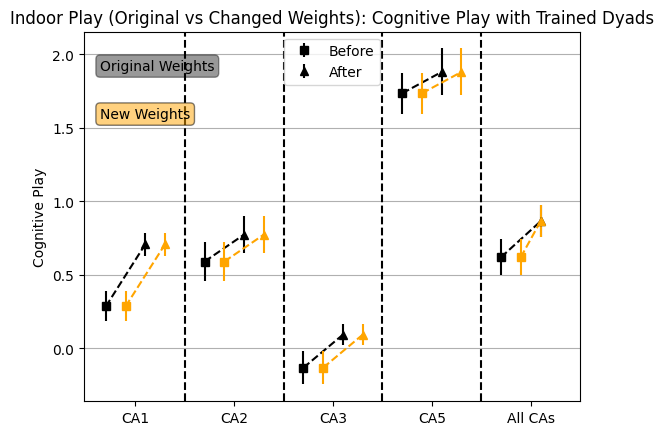

In [26]:
# COGNITIVE PLAY
# original weights
#original weights
cog_weights = np.array([0, -1, 1, 2, 2, 3, 5])
so_weights = np.array([-1, 0, 1, 2, 2, 3, 5])

# before training
before_avg = []
before_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "cog", "base", ca, "indoor"), "cog")
    before_avg.append(statistics[0])
    before_err.append(statistics[2])

overall_bef_avg = np.mean(before_avg)
overall_bef_err = np.mean(before_err)
before_avg.append(overall_bef_avg)
before_err.append(overall_bef_err)

# after training
after_avg = []
after_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "cog", "inter", ca, "indoor"), "cog")
    after_avg.append(statistics[0])
    after_err.append(statistics[2])
    
overall_af_avg = np.mean(after_avg)
overall_af_err = np.mean(after_err)
after_avg.append(overall_af_avg)
after_err.append(overall_af_err)

x_before = np.array([0.5, 3, 5.5, 8, 10.5])
y_before = before_avg
errors_before = before_err

x_after = np.array([1.5, 4, 6.5, 9, 11.5])
y_after = after_avg
errors_after = after_err

# Plotting the error bar graph
plt.errorbar(x_before, y_before, yerr=errors_before, fmt='o', label='Before', color='black', marker='s')
plt.errorbar(x_after, y_after, yerr=errors_after, fmt='o', label='After', color='black', marker='^')
    
# add average line
for i in range(len(x_before)):
    plt.plot([x_before[i], x_after[i]], [before_avg[i], after_avg[i]], color='black', linestyle='--')

# changed weights
#cog_weights = np.array([0, -1, 1, 3, 2, 3, 5])
so_weights = np.array([-2, -1, 0, 2, 4, 3, 5])

# get data points for graph: trained dyads indoor play cognitive 

# before training
before_avg = []
before_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "cog", "base", ca, "indoor"), "cog")
    before_avg.append(statistics[0])
    before_err.append(statistics[2])

overall_bef_avg = np.mean(before_avg)
overall_bef_err = np.mean(before_err)
before_avg.append(overall_bef_avg)
before_err.append(overall_bef_err)

# after training
after_avg = []
after_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "cog", "inter", ca, "indoor"), "cog")
    after_avg.append(statistics[0])
    after_err.append(statistics[2])
    
overall_af_avg = np.mean(after_avg)
overall_af_err = np.mean(after_err)
after_avg.append(overall_af_avg)
after_err.append(overall_af_err)

#  X-axis for "before" and "after" measurements
x_before = np.array([1, 3.5, 6, 8.5, 11])
y_before = before_avg
errors_before = before_err

x_after = np.array([2, 4.5, 7, 9.5, 11.5])
y_after = after_avg
errors_after = after_err

# Plotting the error bar graph
plt.errorbar(x_before, y_before, yerr=errors_before, fmt='o', color='orange', marker='s')
plt.errorbar(x_after, y_after, yerr=errors_after, fmt='o', color='orange', marker='^')

# add average line
for i in range(len(x_before)):
    plt.plot([x_before[i], x_after[i]], [before_avg[i], after_avg[i]], color='orange', linestyle='--')

lines = np.array([2.5, 5, 7.5, 10, 12.5])
# Adding vertical lines to separate groups
for i in range(len(lines) - 1):
    plt.axvline(lines[i], color='black', linestyle='--')
    
# Adding labels and title
plt.ylabel('Cognitive Play')
plt.title('Indoor Play (Original vs Changed Weights): Cognitive Play with Trained Dyads')

# Customizing x-axis ticks and labels
plt.xticks(lines - 1.25, ['CA1', 'CA2', 'CA3', 'CA5', "All CAs"])

# Adding legend
plt.legend()
plt.text(0.15, 0.8, "Original Weights", bbox=dict(facecolor='black', alpha=0.4, edgecolor='black', boxstyle='round,pad=0.3'), transform=plt.gcf().transFigure)
plt.text(0.15, 0.7, "New Weights", bbox=dict(facecolor='orange', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.3'), transform=plt.gcf().transFigure)

# Display the plot
plt.grid(axis='y')
plt.xlim(right=12.5)
plt.show()

In [ ]:
trained_files = get_trained_pair_files()
# Loop through each CA
avg_before = []
avg_after = []
for i, ca in enumerate(ca_peer_list):
    # Get data for the current CA
    before_data = []  # Data before training for current CA
    after_data = []   # Data after training for current CA
        
    # Extract data for the current CA
    before_files = filter_ca_scenario(trained_files, "cog", "base", ca, "indoor")
    for file in before_files:
        score = combined_score(file, cog_weights)
        before_data.append(score)
    after_files = filter_ca_scenario(trained_files, "cog", "inter", ca, "indoor")
    for file in after_files:
        score = combined_score(file, cog_weights)
        after_data.append(score)

    # Perform paired t-test for the current CA
    t_statistic, p_value = stats.ttest_ind(before_data, after_data)
    print("Independent two-sample t-test results:")
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    if p_value <= 0.05:
        print(ca)

C:\Users\jyin1\AppData\Local\Temp\ipykernel_32632\3185901963.py:45: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_before[-1], y_before[-1], yerr=errors_before[-1], fmt='o',
C:\Users\jyin1\AppData\Local\Temp\ipykernel_32632\3185901963.py:48: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_after[-1], y_after[-1], yerr=errors_after[-1], fmt='o',
C:\Users\jyin1\AppData\Local\Temp\ipykernel_32632\3185901963.py:103: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_before[-1], y_before[-1], yerr=errors_before[-1], fmt='o',
C:\Users\jyin1\AppData\Local\Temp\ipykernel_32632\3185901963.py:105: UserWarning: marker is r

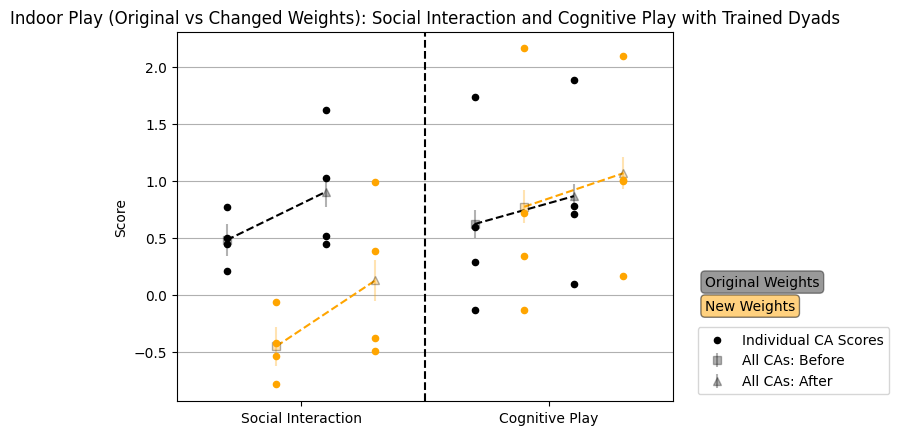

In [71]:
# OG WEIGHTS
# SOCIAL
cog_weights = np.array([0, -1, 1, 2, 2, 3, 5])
so_weights = np.array([-1, 0, 1, 2, 2, 3, 5])

# before training
before_avg = []
before_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "so", "base", ca, "indoor"), "so")
    before_avg.append(statistics[0])
    before_err.append(statistics[2])

overall_bef_avg = np.mean(before_avg)
overall_bef_err = np.mean(before_err)
before_avg.append(overall_bef_avg)
before_err.append(overall_bef_err)

# after training
after_avg = []
after_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "so", "inter", ca, "indoor"), "so")
    after_avg.append(statistics[0])
    after_err.append(statistics[2])
    
overall_af_avg = np.mean(after_avg)
overall_af_err = np.mean(after_err)
after_avg.append(overall_af_avg)
after_err.append(overall_af_err)

x_before = np.array([0.5])
y_before = before_avg
errors_before = before_err

x_after = np.array([1.5])
y_after = after_avg
errors_after = after_err

# Plotting the error bar graph
plt.errorbar(x_before[-1], y_before[-1], yerr=errors_before[-1], fmt='o', 
                label='All CAs: Before', color='black', marker='s',
                zorder=5, alpha = 0.3)
plt.errorbar(x_after[-1], y_after[-1], yerr=errors_after[-1], fmt='o', 
                label='All CAs: After', color='black', marker='^',
                zorder=5, alpha = 0.3)
plt.plot([x_before[-1], x_after[-1]], [before_avg[-1], after_avg[-1]], color='black', linestyle='--')

# Plot individual CA points
x_values = [0.5, 0.5, 0.5, 0.5]
plt.scatter(x_values, y_before[0:4], color='black', s=20, zorder=10)
x_values = [1.5, 1.5, 1.5, 1.5]
plt.scatter(x_values, y_after[0:4], color='black', s=20, zorder=10, 
                label="Individual CA Scores")

# COGNITIVE
cog_weights = np.array([0, -1, 1, 2, 2, 3, 5])
so_weights = np.array([-1, 0, 1, 2, 2, 3, 5])

# before training
before_avg = []
before_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "cog", "base", ca, "indoor"), "cog")
    before_avg.append(statistics[0])
    before_err.append(statistics[2])

overall_bef_avg = np.mean(before_avg)
overall_bef_err = np.mean(before_err)
before_avg.append(overall_bef_avg)
before_err.append(overall_bef_err)

# after training
after_avg = []
after_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "cog", "inter", ca, "indoor"), "cog")
    after_avg.append(statistics[0])
    after_err.append(statistics[2])
    
overall_af_avg = np.mean(after_avg)
overall_af_err = np.mean(after_err)
after_avg.append(overall_af_avg)
after_err.append(overall_af_err)

x_before = np.array([3])
y_before = before_avg
errors_before = before_err

x_after = np.array([4])
y_after = after_avg
errors_after = after_err

# Plotting the error bar graph
plt.errorbar(x_before[-1], y_before[-1], yerr=errors_before[-1], fmt='o', 
                color='black', marker='s', zorder=5, alpha = 0.3)
plt.errorbar(x_after[-1], y_after[-1], yerr=errors_after[-1], fmt='o', 
                color='black', marker='^', zorder=5, alpha = 0.3)
plt.plot([x_before[-1], x_after[-1]], [before_avg[-1], after_avg[-1]], color='black', linestyle='--')
# Plot individual CA points
x_values = [3,3,3,3]
plt.scatter(x_values, y_before[0:4], color='black', s=20, zorder=10)
x_values = [4,4,4,4]
plt.scatter(x_values, y_after[0:4], color='black', s=20, zorder=10)

# CHANGED WEIGHTS
# SOCIAL
cog_weights = np.array([0, -1, 1, 3, 2, 3, 5])
so_weights = np.array([-2, -1, 0, 2, 4, 3, 5])

# before training
before_avg = []
before_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "so", "base", ca, "indoor"), "so")
    before_avg.append(statistics[0])
    before_err.append(statistics[2])

overall_bef_avg = np.mean(before_avg)
overall_bef_err = np.mean(before_err)
before_avg.append(overall_bef_avg)
before_err.append(overall_bef_err)

# after training
after_avg = []
after_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "so", "inter", ca, "indoor"), "so")
    after_avg.append(statistics[0])
    after_err.append(statistics[2])
    
overall_af_avg = np.mean(after_avg)
overall_af_err = np.mean(after_err)
after_avg.append(overall_af_avg)
after_err.append(overall_af_err)

x_before = np.array([1])
y_before = before_avg
errors_before = before_err

x_after = np.array([2])
y_after = after_avg
errors_after = after_err

# Plotting the error bar graph
plt.errorbar(x_before[-1], y_before[-1], yerr=errors_before[-1], fmt='o', 
                color='orange', marker='s', zorder=5, alpha = 0.3, markeredgecolor='black')
plt.errorbar(x_after[-1], y_after[-1], yerr=errors_after[-1], fmt='o', 
                color='orange', marker='^', zorder=5, alpha = 0.3, markeredgecolor='black')
plt.plot([x_before[-1], x_after[-1]], [before_avg[-1], after_avg[-1]], color='orange', linestyle='--')

# Plot individual CA points
x_values = [1,1,1,1]
plt.scatter(x_values, y_before[0:4], color='orange', s=20, zorder=10)
x_values = [2,2,2,2]
plt.scatter(x_values, y_after[0:4], color='orange', s=20, zorder=10)

# COGNITIVE
# before training
before_avg = []
before_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "cog", "base", ca, "indoor"), "cog")
    before_avg.append(statistics[0])
    before_err.append(statistics[2])

overall_bef_avg = np.mean(before_avg)
overall_bef_err = np.mean(before_err)
before_avg.append(overall_bef_avg)
before_err.append(overall_bef_err)

# after training
after_avg = []
after_err = []
for ca in ca_peer_list:
    statistics = get_ca_scenario_stats(
        filter_ca_scenario(
            get_trained_pair_files(), "cog", "inter", ca, "indoor"), "cog")
    after_avg.append(statistics[0])
    after_err.append(statistics[2])
    
overall_af_avg = np.mean(after_avg)
overall_af_err = np.mean(after_err)
after_avg.append(overall_af_avg)
after_err.append(overall_af_err)

x_before = np.array([3.5])
y_before = before_avg
errors_before = before_err

x_after = np.array([4.5])
y_after = after_avg
errors_after = after_err

# Plotting the error bar graph
plt.errorbar(x_before[-1], y_before[-1], yerr=errors_before[-1], fmt='o', 
                color='orange', marker='s', zorder=5, alpha = 0.3, markeredgecolor='black')
plt.errorbar(x_after[-1], y_after[-1], yerr=errors_after[-1], fmt='o', 
                color='orange', marker='^', zorder=5, alpha = 0.3, markeredgecolor='black')
plt.plot([x_before[-1], x_after[-1]], [before_avg[-1], after_avg[-1]], color='orange', linestyle='--')

# Plot individual CA points
x_values = [3.5,3.5,3.5,3.5]
plt.scatter(x_values, y_before[0:4], color='orange', s=20, zorder=10)
x_values = [4.5,4.5,4.5,4.5]
plt.scatter(x_values, y_after[0:4], color='orange', s=20, zorder=10)



# Adding labels and title
plt.ylabel('Score')
plt.title('Indoor Play (Original vs Changed Weights): Social Interaction and Cognitive Play with Trained Dyads')

# Add vertical separation line
plt.axvline(2.5, color='black', linestyle='--')

# Customizing x-axis ticks and labels
lines = np.array([1.25, 3.75])
plt.xticks(lines, ['Social Interaction', 'Cognitive Play'])

# Adding legend
plt.legend(loc='lower right', bbox_to_anchor=(1.45, 0))
plt.text(0.95, 0.35, "Original Weights", bbox=dict(facecolor='black', alpha=0.4, edgecolor='black', boxstyle='round,pad=0.3'), transform=plt.gcf().transFigure)
plt.text(0.95, 0.3, "New Weights", bbox=dict(facecolor='orange', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.3'), transform=plt.gcf().transFigure)

# Display the plot
plt.grid(axis='y')
plt.xlim(left=0, right = 5)
plt.show()